In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
df = pd.read_csv('df_aim.csv',index_col=0)
df

,6month_return_index,6month_return,6month_log_return,1Year_return_index,1Year_return,1Year_log_return,투자의견_x,idx,작성일,code,투자의견,idx.1,report,okt_tokens,khaiii_tokens
0,-0.104423,-0.239448,-0.273711,-0.248988,-0.356331,-0.440571,buy,473108,2018-04-18,88350,buy,473108,년 월 일 기업분석건설유틸리티 한화생명 기업이슈 브리프보험 년 월 일 ...,"['건설', '유틸리티', '생명', '이슈', '브리프', '보험', '조원', ...",년 월 일 기업 분석 건설유틸리티 한화생 명 기업 이슈 브리프보험 년 월 일 조원 ...
1,-0.080096,-0.213645,-0.240346,-0.266345,-0.423698,-0.551124,buy,479661,2018-05-31,88350,buy,479661,년 월 일 기업분석 한화생명 시점은 불확실하나 Upside risk는 가장 ...,"['생명', '가장', '성용', '유지', '목표', '주가', '하향', '주가...",년 월 일 기업 분석 한화생 명 시점 성 용훈 유지 목표 주가하향 원 주가 원 상승...
2,-0.077229,-0.134774,-0.144764,-0.362865,-0.466049,-0.627452,buy,493832,2018-09-18,88350,buy,493832,보험업 Neutral Initiation 종목명 투자의견 목표주가M ...,"['보험', '목표', '주가', '화재', '현대', '해상', '손해', '보험...",보험업 종목명 투자 의견 목표 주가 삼성화재 현대 해상 손해 보험 메리츠화재 한화손...
3,-0.102360,-0.075034,-0.077998,-0.139111,-0.096862,-0.101880,buy,293653,2012-11-09,88350,buy,293653,이슈코멘트 l 기업 이트레이드증권 리서치본부 FY Q 순이익 억원으로...,"['이슈', '본부', '순이익', '억원', '사업', '계획', '부합', '수...",이 슈 코멘트 기업 이트레이드증권 리 서치 본부 순이익 원 사업 계획 부합 실적 시...
4,-0.175222,-0.016224,-0.016357,-0.193884,0.084071,0.080723,buy,400398,2016-11-23,88350,buy,400398,보험Positive 걱정이 줄었으니 기대가 커지는 것이 ...,"['보험', '걱정', '기대', '순리', '성용', '보험', '주가', '가지...",보험 걱정 기대 것 순리 성 용훈 보험주 주가 가지 요인 금리 규제 공포 완화 저점...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18713,0.057630,0.014013,0.013915,-0.158888,-0.185987,-0.205779,strongbuy,345498,2015-03-17,7160,strongbuy,345498,Microsoft Word CUNITdoc사조산업 재평가의 시기가 왔다 사조그룹...,"['산업', '평가', '시기', '그룹', '실질', '지주회사', '역할', '...",사조산업 재평가 시기 사 조 그 룹 실질 지주 회사 역할 수행 회사 참치어 상승 트...
18714,0.046595,-0.004049,-0.004057,0.020880,0.004049,0.004040,strongbuy,353325,2015-06-12,13700,strongbuy,353325,Microsoft Word doc 증권보험신사업 Analy...,"['보험', '사업', '이태경', '한기현', '이지수', '거대도시', '스마트...",증권 보험 신사업 이태경 한기현 이 지수 거대 도시 스마 트시티 스마트 시티 거대 ...
18715,-0.289034,-0.319101,-0.384341,-0.461999,-0.486142,-0.665809,strongbuy,352285,2015-06-01,189860,strongbuy,352285,기업분석 서전기전KQ 상반기보단 하반기 기계조선건...,"['기전', '상반기', '하반기', '기계', '조선', '건설', '부동산', ...",기업 분석 서 전기전 상반기보 하반기 기계 조선 건설 부동산 담당 이상우 매출 원 ...
18716,-0.279320,-0.226148,-0.256375,-0.582808,-0.492580,-0.678415,strongbuy,345568,2015-03-17,189860,strongbuy,345568,기계전력산업 송배전망 증설 잊고 지내던 성장산업 Overweight상향 발...,"['기계', '전력', '산업', '송배전', '증설', '성장', '산업', '상...",기계 전력 산업 송배 전망 증설 성장 산업 상향 발전 설비 증설 뿐 송배 전망 증설...


In [7]:
df1 = df[['6month_return_index', '6month_return', '6month_log_return',
       '1Year_return_index', '1Year_return', '1Year_log_return','idx','투자의견']]

In [8]:
def get_outlier(df=None, weight=1.5):
    
    percent_25 = np.percentile(df, 25)
    percent_75 = np.percentile(df, 75)
    iqr = percent_75 - percent_25

    highest_lim = percent_75 + (iqr*weight*2)
    lowest_lim = percent_25 - (iqr*weight)

    outlier_idx = df[(df > highest_lim) | (df < lowest_lim)].index.tolist()
    return outlier_idx

### '6month_return'

In [9]:
df1.drop(get_outlier(df1['6month_return'], weight=1.5), axis=0, inplace=True)

In [10]:
df1.drop(get_outlier(df1['6month_return_index'], weight=1.8), axis=0, inplace=True)

In [11]:
df1

,6month_return_index,6month_return,6month_log_return,1Year_return_index,1Year_return,1Year_log_return,idx,투자의견
0,-0.104423,-0.239448,-0.273711,-0.248988,-0.356331,-0.440571,473108,buy
1,-0.080096,-0.213645,-0.240346,-0.266345,-0.423698,-0.551124,479661,buy
2,-0.077229,-0.134774,-0.144764,-0.362865,-0.466049,-0.627452,493832,buy
3,-0.102360,-0.075034,-0.077998,-0.139111,-0.096862,-0.101880,293653,buy
4,-0.175222,-0.016224,-0.016357,-0.193884,0.084071,0.080723,400398,buy
...,...,...,...,...,...,...,...,...
18713,0.057630,0.014013,0.013915,-0.158888,-0.185987,-0.205779,345498,strongbuy
18714,0.046595,-0.004049,-0.004057,0.020880,0.004049,0.004040,353325,strongbuy
18715,-0.289034,-0.319101,-0.384341,-0.461999,-0.486142,-0.665809,352285,strongbuy
18716,-0.279320,-0.226148,-0.256375,-0.582808,-0.492580,-0.678415,345568,strongbuy


In [20]:
a=np.array(df1['6month_return'])

In [21]:
bins = [-0.7, -0.3, -0.2,-0.15,-0.1,0, 0.1,0.15,0.2,0.3, 0.4, 0.8]
bins

[-0.7, -0.3, -0.2, -0.15, -0.1, 0, 0.1, 0.15, 0.2, 0.3, 0.4, 0.8]

In [22]:
a_cut = pd.cut(a,bins,right=True)

In [23]:
frq = pd.value_counts(a_cut).sort_index()
frq_sum = frq.sum()

In [24]:
pd.DataFrame({'도수':frq,
            '상대도수':[i/frq_sum for i in frq],
            '누적도수' : frq.cumsum()})

,도수,상대도수,누적도수
"(-0.7, -0.3]",1298,0.071026,1298
"(-0.3, -0.2]",2051,0.112230,3349
"(-0.2, -0.15]",1415,0.077428,4764
"(-0.15, -0.1]",1577,0.086293,6341
"(-0.1, 0.0]",3705,0.202736,10046
"(0.0, 0.1]",2900,0.158687,12946
"(0.1, 0.15]",1143,0.062544,14089
"(0.15, 0.2]",902,0.049357,14991
"(0.2, 0.3]",1318,0.072120,16309
"(0.3, 0.4]",807,0.044159,17116


(array([1297., 2047., 1416., 1574., 3636., 2972., 1144.,  899., 1321.,
         805., 1164.]),
 array([-0.7 , -0.3 , -0.2 , -0.15, -0.1 ,  0.  ,  0.1 ,  0.15,  0.2 ,
         0.3 ,  0.4 ,  0.8 ]),
 <BarContainer object of 11 artists>)

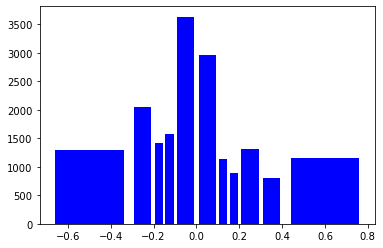

In [25]:
plt.hist(a, bins = bins,rwidth = 0.8,color='blue')

### 수정

In [26]:
bins = [-0.7, -0.3, -0.2,-0.15,-0.1,-0.05,0,0.05, 0.1,0.15,0.2,0.3, 1.0]
bins

[-0.7, -0.3, -0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2, 0.3, 1.0]

In [27]:
a_cut = pd.cut(a,bins,right=True)
frq = pd.value_counts(a_cut).sort_index()
frq_sum = frq.sum()
df_cut=pd.DataFrame({'도수':frq,
            '상대도수':[i/frq_sum for i in frq],
            '누적도수' : frq.cumsum()})
df_cut

,도수,상대도수,누적도수
"(-0.7, -0.3]",1298,0.070413,1298
"(-0.3, -0.2]",2051,0.111262,3349
"(-0.2, -0.15]",1415,0.076760,4764
"(-0.15, -0.1]",1577,0.085548,6341
"(-0.1, -0.05]",1932,0.104806,8273
"(-0.05, 0.0]",1773,0.096181,10046
"(0.0, 0.05]",1589,0.086199,11635
"(0.05, 0.1]",1311,0.071119,12946
"(0.1, 0.15]",1143,0.062005,14089
"(0.15, 0.2]",902,0.048931,14991


(array([1297., 2047., 1416., 1574., 1935., 1701., 1664., 1308., 1144.,
         899., 1321., 2158.]),
 array([-0.7 , -0.3 , -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,
         0.15,  0.2 ,  0.3 ,  1.5 ]),
 <BarContainer object of 12 artists>)

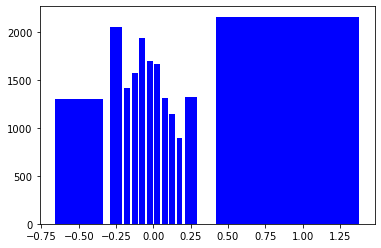

In [19]:
plt.hist(a, bins = bins,rwidth = 0.8,color='blue')

In [186]:
bins_label = [(str(x),alpha) for x,alpha in zip(df_cut.index, ['M','L','K','J','I','H','G','F','E','D','C','B','A'])]
bins_label

[('(-0.7, -0.3]', 'M'),
 ('(-0.3, -0.2]', 'L'),
 ('(-0.2, -0.15]', 'K'),
 ('(-0.15, -0.1]', 'J'),
 ('(-0.1, -0.05]', 'I'),
 ('(-0.05, 0.0]', 'H'),
 ('(0.0, 0.05]', 'G'),
 ('(0.05, 0.1]', 'F'),
 ('(0.1, 0.15]', 'E'),
 ('(0.15, 0.2]', 'D'),
 ('(0.2, 0.3]', 'C'),
 ('(0.3, 1.5]', 'B')]

In [187]:
df2 = df1.copy()

In [193]:
df2["interval"] = pd.cut(df2["6month_return"], bins, right=False, labels=bins_label)
df2['Label'] = df2['interval'].apply(lambda x : x[1])
df2['interval'] = df2['interval'].apply(lambda x : x[0])
df_temp=df2.copy()
df_temp

,6month_return_index,6month_return,6month_log_return,1Year_return_index,1Year_return,1Year_log_return,idx,투자의견,interval,Label
0,-0.104423,-0.239448,-0.273711,-0.248988,-0.356331,-0.440571,473108,buy,"(-0.3, -0.2]",L
1,-0.080096,-0.213645,-0.240346,-0.266345,-0.423698,-0.551124,479661,buy,"(-0.3, -0.2]",L
2,-0.077229,-0.134774,-0.144764,-0.362865,-0.466049,-0.627452,493832,buy,"(-0.15, -0.1]",J
3,-0.102360,-0.075034,-0.077998,-0.139111,-0.096862,-0.101880,293653,buy,"(-0.1, -0.05]",I
4,-0.175222,-0.016224,-0.016357,-0.193884,0.084071,0.080723,400398,buy,"(-0.05, 0.0]",H
...,...,...,...,...,...,...,...,...,...,...
18713,0.057630,0.014013,0.013915,-0.158888,-0.185987,-0.205779,345498,strongbuy,"(0.0, 0.05]",G
18714,0.046595,-0.004049,-0.004057,0.020880,0.004049,0.004040,353325,strongbuy,"(-0.05, 0.0]",H
18715,-0.289034,-0.319101,-0.384341,-0.461999,-0.486142,-0.665809,352285,strongbuy,"(-0.7, -0.3]",M
18716,-0.279320,-0.226148,-0.256375,-0.582808,-0.492580,-0.678415,345568,strongbuy,"(-0.3, -0.2]",L


In [196]:
df = pd.read_csv('sample_report_token_okt_khaiii.csv',index_col=0)
df = df.set_index('idx')
df.dropna(inplace=True)
df_aim=pd.merge(df_temp, df, how='inner', on='idx')
df_aim.drop(['투자의견_x','code','idx.1','작성일'],axis=1,inplace=True)
df_aim.rename(columns={'투자의견_y':'투자의견'},inplace=True)
df_aim

,6month_return_index,6month_return,6month_log_return,1Year_return_index,1Year_return,1Year_log_return,idx,interval,Label,투자의견,report,okt_tokens,khaiii_tokens
0,-0.104423,-0.239448,-0.273711,-0.248988,-0.356331,-0.440571,473108,"(-0.3, -0.2]",L,buy,년 월 일 기업분석건설유틸리티 한화생명 기업이슈 브리프보험 년 월 일 ...,"['건설', '유틸리티', '생명', '이슈', '브리프', '보험', '조원', ...",년 월 일 기업 분석 건설유틸리티 한화생 명 기업 이슈 브리프보험 년 월 일 조원 ...
1,-0.080096,-0.213645,-0.240346,-0.266345,-0.423698,-0.551124,479661,"(-0.3, -0.2]",L,buy,년 월 일 기업분석 한화생명 시점은 불확실하나 Upside risk는 가장 ...,"['생명', '가장', '성용', '유지', '목표', '주가', '하향', '주가...",년 월 일 기업 분석 한화생 명 시점 성 용훈 유지 목표 주가하향 원 주가 원 상승...
2,-0.077229,-0.134774,-0.144764,-0.362865,-0.466049,-0.627452,493832,"(-0.15, -0.1]",J,buy,보험업 Neutral Initiation 종목명 투자의견 목표주가M ...,"['보험', '목표', '주가', '화재', '현대', '해상', '손해', '보험...",보험업 종목명 투자 의견 목표 주가 삼성화재 현대 해상 손해 보험 메리츠화재 한화손...
3,-0.102360,-0.075034,-0.077998,-0.139111,-0.096862,-0.101880,293653,"(-0.1, -0.05]",I,buy,이슈코멘트 l 기업 이트레이드증권 리서치본부 FY Q 순이익 억원으로...,"['이슈', '본부', '순이익', '억원', '사업', '계획', '부합', '수...",이 슈 코멘트 기업 이트레이드증권 리 서치 본부 순이익 원 사업 계획 부합 실적 시...
4,-0.175222,-0.016224,-0.016357,-0.193884,0.084071,0.080723,400398,"(-0.05, 0.0]",H,buy,보험Positive 걱정이 줄었으니 기대가 커지는 것이 ...,"['보험', '걱정', '기대', '순리', '성용', '보험', '주가', '가지...",보험 걱정 기대 것 순리 성 용훈 보험주 주가 가지 요인 금리 규제 공포 완화 저점...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18459,0.057630,0.014013,0.013915,-0.158888,-0.185987,-0.205779,345498,"(0.0, 0.05]",G,strongbuy,Microsoft Word CUNITdoc사조산업 재평가의 시기가 왔다 사조그룹...,"['산업', '평가', '시기', '그룹', '실질', '지주회사', '역할', '...",사조산업 재평가 시기 사 조 그 룹 실질 지주 회사 역할 수행 회사 참치어 상승 트...
18460,0.046595,-0.004049,-0.004057,0.020880,0.004049,0.004040,353325,"(-0.05, 0.0]",H,strongbuy,Microsoft Word doc 증권보험신사업 Analy...,"['보험', '사업', '이태경', '한기현', '이지수', '거대도시', '스마트...",증권 보험 신사업 이태경 한기현 이 지수 거대 도시 스마 트시티 스마트 시티 거대 ...
18461,-0.289034,-0.319101,-0.384341,-0.461999,-0.486142,-0.665809,352285,"(-0.7, -0.3]",M,strongbuy,기업분석 서전기전KQ 상반기보단 하반기 기계조선건...,"['기전', '상반기', '하반기', '기계', '조선', '건설', '부동산', ...",기업 분석 서 전기전 상반기보 하반기 기계 조선 건설 부동산 담당 이상우 매출 원 ...
18462,-0.279320,-0.226148,-0.256375,-0.582808,-0.492580,-0.678415,345568,"(-0.3, -0.2]",L,strongbuy,기계전력산업 송배전망 증설 잊고 지내던 성장산업 Overweight상향 발...,"['기계', '전력', '산업', '송배전', '증설', '성장', '산업', '상...",기계 전력 산업 송배 전망 증설 성장 산업 상향 발전 설비 증설 뿐 송배 전망 증설...


In [202]:
df_tfidf =df_aim[['khaiii_tokens','interval','6month_return','Label']]
df_tfidf.set_index('interval',inplace=True)
df_tfidf

,khaiii_tokens,6month_return,Label
interval,,,
"(-0.3, -0.2]",년 월 일 기업 분석 건설유틸리티 한화생 명 기업 이슈 브리프보험 년 월 일 조원 ...,-0.239448,L
"(-0.3, -0.2]",년 월 일 기업 분석 한화생 명 시점 성 용훈 유지 목표 주가하향 원 주가 원 상승...,-0.213645,L
"(-0.15, -0.1]",보험업 종목명 투자 의견 목표 주가 삼성화재 현대 해상 손해 보험 메리츠화재 한화손...,-0.134774,J
"(-0.1, -0.05]",이 슈 코멘트 기업 이트레이드증권 리 서치 본부 순이익 원 사업 계획 부합 실적 시...,-0.075034,I
"(-0.05, 0.0]",보험 걱정 기대 것 순리 성 용훈 보험주 주가 가지 요인 금리 규제 공포 완화 저점...,-0.016224,H
...,...,...,...
"(0.0, 0.05]",사조산업 재평가 시기 사 조 그 룹 실질 지주 회사 역할 수행 회사 참치어 상승 트...,0.014013,G
"(-0.05, 0.0]",증권 보험 신사업 이태경 한기현 이 지수 거대 도시 스마 트시티 스마트 시티 거대 ...,-0.004049,H
"(-0.7, -0.3]",기업 분석 서 전기전 상반기보 하반기 기계 조선 건설 부동산 담당 이상우 매출 원 ...,-0.319101,M


In [205]:
from konlpy.tag import Okt
import re

okt= Okt()

def han_text_clean(text):
    text = re.sub("[^가-힣ㄱ-ㅎa-zA-Z ]", "", text)
   
    return text

with open('stopwords-ko.txt', 'r', encoding = 'utf-8') as f:
    sw1 = f.read()
    sw1 = re.sub('\\n', ' ', sw1)
    sw1 = sw1.split()

stop_report = '리서치센터  Compliance Notice 본 조사분석자료는 제3자에게 사전 제공된 사실이 없습니다. 당사는 자료작성일 현재 본 조사분석자료에 언급된 종목의 지분을 1% 이상 보유하고 있지 않습니다. \
본 자료를 작성한 애널리스트는 자료작성일 현재 해당 종목과 재산적 이해관계가 없습니다. 본 자료에 게재된 내용은 본인의 의견을 정확하게 반영하고 있으며, 외부의 부당한 압력이나 간섭 없이 신의 성실하게 작성되었음을 확인합니다. \
본 자료는 투자자들의 투자판단에 참고가 되는 정보제공을 목적으로 배포되는 자료입니다. 본 자료에 수록된 내용은 당사 리서치센터의 추정치로서 오차가 발생할 수 있으며 정확성이나 완벽성은 보장하지 않습니다. \
본 자료를 이용하시는 분은 본 자료와 관련한 투자의 최종 결정은 자신의 판단으로 하시기 바랍니다. 따라서 어떠한 경우에도 본 자료는 투자 결과와 관련한 법적 책임소재의 증빙자료로 사용될 수 없습니다. \
본 조사분석자료는 당사 고객에 한하여 배포되는 자료로 당사의 허락 없이 복사, 대여, 배포 될 수 없습니다.\
투자등급 이 자료에 게재된 내용들은 본인의 의견을 정확하게 반영하고 있으며, 외부의 부당한 압력이나 간섭없이 작성되었음을 확인합니다.(작성자 : 하준두) 자료 제공일 현재\
당사는 상기 회사가 발행한 주식을 1% 이상 보유하고 있지 않습니다. 자료 제공일 현재 당사는 지난 1년간 상기 회사의 최초 증권시장 상장시 대표 주관사로 참여한 적이 없습니다. \
자료제공일 현재 조사분석 담당자는 상기회사가 발행한 주식 및 주식관련사채에 대하여 규정상 고지하여야 할 재산적 이해관계가 없으며, 추천의견을 제시함에 있어 어떠한 금전적 보상과도 연계되어 있지 않습니다. \
당자료는 상기 회사 및 상기회사의 유가증권에 대한 조사분석담당자의 의견을 정확히 반영하고있으나 이는 자료제공일 현재 시점에서의 의견 및 추정치로서 실적치와 오차가 발생할 수 있으며, \
투자를 유도할 목적이 아니라 투자자의 투자판단에 참고가 되는 정보제공을 목적으로 하고 있습니다. 따라서 종목의 선택이나 투자의 최종결정은 투자자 자신의 판단으로 하시기 바랍니다. \
Analyst, 증권,한화투자증권, 하이투자증권, 대신증권, SK증권, IBK투자증권, 키움증권, 이베스트증권,유안타증권, 메리츠증권, 유진투자증권, 카카오페이증권, 한양증권, 하나금융투자, 교보증권, \
현대차투자증권, 메리츠종금증권, 삼성증권, KTB투자증권, 신한금융투자, 한국투자증권,미래에셋대우, KB증권, 미래에셋증권, 하나대투증권, HMC투자증권, NH농협증권, 현대증권,\
동양증권, KDB대우증권, 이트레이드증권, 우리투자증권, 하이증권, 우리증권, 신한금융,대우증권, NH증권, 유진증권, 한투증권, 한화증권, 한화투자증권, 작성자, 한화리서치, 기업, 코멘트,Microsoft, Word,PowerPoint,IBSPPRdoc,CUNITdoc'

stop_report = re.sub("[^가-힣ㄱ-ㅎa-zA-Z ]", "", stop_report)
  
sw2 = okt.nouns(han_text_clean(stop_report))

stopwords = sw1 + sw2

In [206]:
x = df_tfidf.khaiii_tokens
y = df_tfidf['Label']

In [208]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42,test_size=0.3)

In [209]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time

In [210]:
%%time

tfidf_vect = TfidfVectorizer(stop_words = stopwords, min_df = 50,max_df =0.8, max_features = 10000,\
                                ngram_range = (1, 2),sublinear_tf = True) # TF의 이상치 제거
tfidf_vect.fit(x_train)

Wall time: 50.1 s


TfidfVectorizer(max_df=0.8, max_features=10000, min_df=50, ngram_range=(1, 2),
                stop_words=['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면',
                            '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과',
                            '같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에',
                            '이르다', '결국', '결론을', '낼', '수', '있다', '겸사겸사', ...],
                sublinear_tf=True)

In [211]:
%%time
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

Wall time: 44.9 s


In [212]:
x_train_tfidf_vect.shape

(12924, 10000)

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [214]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rtc = RandomForestClassifier()
ada = AdaBoostClassifier()
lgb = LGBMClassifier()
gdb = GradientBoostingClassifier()
xgb = XGBClassifier(eval_metric='logloss')
mlp = MLPClassifier()

In [215]:
models=[knn,dtc,rtc,ada,lgb,gdb,xgb,mlp]
for m in models :
    m.fit(x_train_tfidf_vect,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_tfidf_vect, y_train))
    print(m.score(x_test_tfidf_vect,y_test))
    print()

KNeighborsClassifier
0.3737233054781801
0.12346570397111914

DecisionTreeClassifier
0.9257195914577531
0.1055956678700361

RandomForestClassifier
0.9257195914577531
0.14151624548736463

AdaBoostClassifier
0.15026307644692047
0.12743682310469315

LGBMClassifier
0.9195295574125658
0.1315884476534296

GradientBoostingClassifier
0.5436397400185701
0.13429602888086642

XGBClassifier
0.9138811513463324
0.13212996389891696

MLPClassifier
0.9236304549675023
0.13465703971119133

